<a href="https://colab.research.google.com/github/japerego/DroidCafe/blob/master/practica9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 9 Parte 2: Análisis de sentimientos

El análisis de sentimientos es un problema de procesado de lenguaje natural donde se pretende conocer la intención de un texto. En esta práctica vamos a ver cómo predecir el sentimiento, positivo o negativo, de una valoracion de una película.

En esta ocasión vamos a utilizar la librería de deep learning [Keras](https://keras.io/).


En esta práctica es importante que actives el uso de GPU. Para ello ve al menú Edit -> Notebook settings y en la opción Hardware accelerator selecciona la opción de GPU.


## Dataset

El dataset usado en esta sesión es el dataset [IMDB](http://ai.stanford.edu/~amaas/data/sentiment/). Dicho dataset contiene 25000 valoraciones (positivas y negativas) para entrenar, y 25000 valoraciones  para testear. El objetivo es ser capaz de determinar si una valoración de una película es positiva o negativa. 

Keras proporciona acceso directo al dataset IMDB en un formato listo para ser usado por las redes neuronales, lo que evita tener que descargarlo y procesarlo. La función ``imdb.load_data()`` permite cargar el dataset donde las palabras han sido reemplazadas por enteros que indican la popularidad (número de apariciones)  de una palabra en el dataset. 

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
from matplotlib import pyplot as plt
%matplotlib inline

(X_train,y_train), (X_test,y_test) = imdb.load_data()

A continuación mostramos la forma del dataset

In [2]:
print("Datos entrenamiento: ")
print(X_train.shape)
print(y_train.shape)

print("Datos test: ")
print(X_test.shape)
print(y_test.shape)

Datos entrenamiento: 
(25000,)
(25000,)
Datos test: 
(25000,)
(25000,)


Podemos también mostrar que aspecto tienen los elementos de nuestro dataset. 

In [3]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

A partir de la instrucción anterior podemos ver que los elementos de nuestro dataset se representan mediante una lista de enteros, donde cada entero está asociado a una palabra. Para restaurar el mensaje original podemos ejecutar el siguiente comando.

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

Podemos también mostrar el número de clases (veremos que nos devuelve dos clases, el 0 representa una valoración negativa y el 1 una valoración positiva)

In [5]:
print("Clases: ")
print(np.unique(y_train))

Clases: 
[0 1]


También podemos ver el número total de palabras del dataset. 

In [6]:
print("Número de palabras: ")
print(len(np.unique(np.hstack(X_train))))

Número de palabras: 
88585


Finalmente, podemos ver la longitud media de las valoraciones. 

Longitud media: 
Media 238.71 palabras (176.493674)


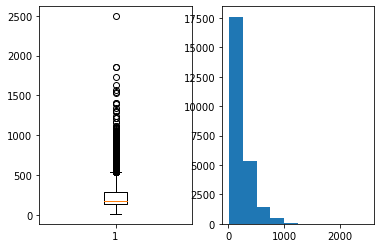

In [7]:
print("Longitud media: ")
result = [len(x) for x in X_train]
print("Media %.2f palabras (%f)" % (np.mean(result),np.std(result)))
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

##### Ejercicio
A partir de los diagramas anteriores, ¿qué puedes decir del tamaño de las valoraciones? ¿Cuál sería el tamaño de la valoración más larga (para esta pregunta puedes ejecutar alguna instrucción adicional)?

Su media se encuentra en 238 palabras, aunque se pueden encontrar valoraciones de de hasta casi 3000, la mayoria de las valoraciones estan entre 0 y 1000 etc.
Valoración mas larga : 2494

In [19]:
max = 0
for x in X_train:
  if(len(x)>max):
    max=len(x)
print(max)

2494


## Word embeddings

Como ya hemos visto, uno de los grandes avances más recientes en el área del procesamiento de lenguaje natural son los *word embeddings*. Los *word embeddings* son una técnica donde las palabras se codifican como vectores de reales en un espacio de dimensión alta, donde las similaridad entre palabras se traduce en cercanía de los vectores. Esto s muy útil ya que al trabajar con redes neuronales se requiere una conversión de las palabras a números. 

Por el momento no vamos a usar ningún word embedding de los vistos con anterioridad, sino que vamos aprenderlos directamente a partir de nuestros datos. Keras proporciona una manera sencilla de convertir representaciones de palabras mediante enteros positios a un word embedding mediante una capa de ``Embedding``. Esta capa toma argumentos que definen la asociación de palabras a vectores. Estos argumentos incluyen el número máximo de palabras esperadas, también conocido como el tamaño del vocabulario. Esta capa también permite especificar la dimensionalidad de la representación.

Queremos usar una representación para nuestro dataset. Digamos que estamos interesados en las 5000 palabras más usadas del dataset. Por lo tanto, nuestro vocabulario tendrá 5000 elementos. También podemos elegir usar un vector de dimensión 32 para representar cada una de las palabras. Finalmente, podemos fijar que la longitud máxima de las valoraciones sea de 500 palabras, truncando aquellas que son más largas y añadiendo ceros a las que son más cortas. Vamos a obtener de nuevo nuestro dataset teniendo esto en cuenta. También vamos a definir un conjunto de validación usando el 20% del conjunto de entrenamiento. 

In [22]:
from sklearn.model_selection import train_test_split
(X_train,y_train), (X_test,y_test) = imdb.load_data(num_words=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.2,
                                                    random_state=15)

Podemos ahora truncar o completar cada una de las valoraciones para que contenga 500 palabras.

In [23]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

## Modelo Red Neuronal Simple

Vamos a construir varios modelos para nuestro dataset. Comenzaremos con una red neuronal multicapa con una única capa oculta. La innovación será la capa de word embedding que muestra cómo se pueden conseguir buenos resultados con un modelo tan simple. 

Comenzamos importando las funciones necesarias e inicializando una semilla para obtener resultados consistentes. 

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

seed = 15
np.random.seed(seed)

A continuación creamos nuestro modelo.

In [25]:
top_words = 5000
def create_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model1 = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


Vamos ahora a entrenar el modelo y a mostrar su curva de entrenamiento y validación. 

In [26]:
history = model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
157/157 [==============================] - 5s 7ms/step - loss: 0.6234 - accuracy: 0.6058 - val_loss: 0.3556 - val_accuracy: 0.8460
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 0.2417 - accuracy: 0.9017 - val_loss: 0.3248 - val_accuracy: 0.8606
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0809 - accuracy: 0.9751 - val_loss: 0.3652 - val_accuracy: 0.8746
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0188 - accuracy: 0.9969 - val_loss: 0.4725 - val_accuracy: 0.8630
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 0.5211 - val_accuracy: 0.8674
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 9.8056e-04 - accuracy: 1.0000 - val_loss: 0.5593 - val_accuracy: 0.8662
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 5.3624e-04 - accuracy: 1.0000 - val_loss: 0.5856 - val_accuracy: 0.866

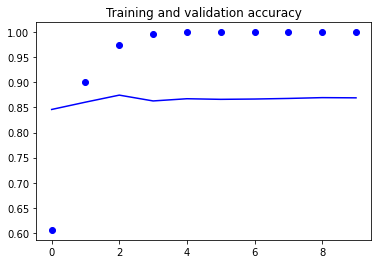

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

##### Ejercicio
A partir de las gráficas anteriores ¿qué problema tiene nuestro modelo?

Respuesta: 

Nuestro modelo mejora en entrenamiento pero no mejora en validación, esta sobreajustandose, perdiendo acc en validación pero aumentando en entrenamiento

Para evitar el problema anterior, vamos a entrenar de nuevo nuestra red, pero sólo 2 épocas. 

In [31]:
model2 = create_model()
model2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_2 (Dense)             (None, 250)               4000250   
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
157/157 [==============================] - 1s 7ms/step - loss: 0.5293 - accuracy: 0.6994 - val_loss: 0.3557 - val_accuracy: 0.8446
Epoch 2/2
157/157 [===========

Por último, evaluamos nuestro modelo en el conjunto de test. 

In [32]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.88%


Podemos también evaluar el modelo que tenía el problema y podemos ver que la accuracy es peor que la que hemos obtenido con el otro modelo, a pesar de haberlo entrenado por menos tiempo. 

In [33]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.48%


## Red neuronal convolucional de una dimensión

Las redes neuronales convolucionales fueron creadas para tener en cuenta la estructura espacial de los datos en imágenes siendo robustas a cambios en la posición y orientación de los objetos. Este mismo principio se puede aplicar a secuencias como son las secuencias 1-dimensionales de palabras de una valoración de película.  Vamos a utilizar dicha propiedad en nuestro problema. 

Comenzamos cargando las librerías necesarias para trabajar con redes convolucionales 1-dimensionales. 

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding

Definimos el modelo.

In [35]:
def create_cnn_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Convolution1D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model3 = create_cnn_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 8000)              0         
                                                                 
 dense_4 (Dense)             (None, 250)               2000250   
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                      

Entrenamos este nuevo modelo. 

In [36]:
model3.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Epoch 1/2
157/157 [==============================] - 10s 8ms/step - loss: 0.4804 - accuracy: 0.7426 - val_loss: 0.2779 - val_accuracy: 0.8882
Epoch 2/2
157/157 [==============================] - 1s 7ms/step - loss: 0.2117 - accuracy: 0.9161 - val_loss: 0.2726 - val_accuracy: 0.8928


Y evaluamos su precisión. 

In [37]:
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.43%


Como podemos ver, este modelo mejora los resultados obtenidos con el modelo anterior. 

## LSTM

Vamos a crear ahora una pequeña red LSTM. Como en casos anteriores comenzamos cargando las librerías necesarias. 

In [38]:
from keras.layers import LSTM

Definimos el modelo. 

In [39]:
def create_lstm_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(LSTM(100))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model4 = create_lstm_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


Entrenamos el modelo. 

In [40]:
model4.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Epoch 1/2
157/157 [==============================] - 8s 34ms/step - loss: 0.5162 - accuracy: 0.7304 - val_loss: 0.3160 - val_accuracy: 0.8742
Epoch 2/2
157/157 [==============================] - 5s 31ms/step - loss: 0.2892 - accuracy: 0.8844 - val_loss: 0.2935 - val_accuracy: 0.8814


Y por último lo evaluamos contra el conjunto de test. 

In [41]:
scores = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.37%


## LSTM con Dropout

Uno de los problemas que tienen todas las redes que hemos definido hasta ahora es que tienden a sobreajustarse muy rápido. Para evitar dicho problema se puede utilizar la técnica de Dropout. 

Para ello definimos el siguiente modelo. 


In [42]:
from keras.layers import Dropout

In [43]:
def create_lstm_dropout_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Dropout(0.2))
  model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model5 = create_lstm_dropout_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           160000    
                                                                 
 dropout (Dropout)           (None, 500, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


##### Ejercicio

¿Por cuántas épocas puedes entrenar el nuevo modelo hasta que aparece el sobreajuste?

In [44]:
history = model5.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
157/157 [==============================] - 309s 2s/step - loss: 0.5800 - accuracy: 0.6858 - val_loss: 0.3854 - val_accuracy: 0.8390
Epoch 2/10
157/157 [==============================] - 303s 2s/step - loss: 0.3338 - accuracy: 0.8624 - val_loss: 0.2938 - val_accuracy: 0.8820
Epoch 3/10
157/157 [==============================] - 305s 2s/step - loss: 0.2669 - accuracy: 0.8941 - val_loss: 0.3044 - val_accuracy: 0.8780
Epoch 4/10
157/157 [==============================] - 304s 2s/step - loss: 0.2360 - accuracy: 0.9070 - val_loss: 0.3642 - val_accuracy: 0.8684
Epoch 5/10
157/157 [==============================] - 303s 2s/step - loss: 0.1999 - accuracy: 0.9247 - val_loss: 0.3243 - val_accuracy: 0.8844
Epoch 6/10
157/157 [==============================] - 302s 2s/step - loss: 0.1873 - accuracy: 0.9283 - val_loss: 0.3642 - val_accuracy: 0.8548
Epoch 7/10
157/157 [==============================] - 304s 2s/step - loss: 0.1625 - accuracy: 0.9391 - val_loss: 0.3411 - val_accuracy: 0.8686

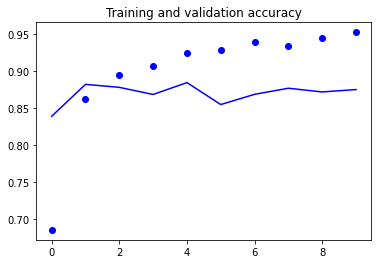

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

##### Ejercicio
¿Qué accuracy consigues obtener con este nuevo modelo?

La mejor accuracy es
Epoch 5/10
157/157 [==============================] - 303s 2s/step - loss: 0.1999 - accuracy: 0.9247 - val_loss: 0.3243 - val_accuracy: 0.8844

En validación por supuesto

## Predicciones propias

Una vez construido nuestro modelo nos interesa probarlo con nuestras propias valoraciones. Para ello debemos convertir la frase a un formato que pueda alimentar a la red como se muestra a continuación. 

In [46]:
review = "i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely awful"
review = review.split(" ")
review = [word_index[w] for w in review]
review = sequence.pad_sequences([review], maxlen=max_words)

Y hacer la predicción con uno de nuestros modelos. 

In [47]:
model4.predict(review)

array([[0.03352761]], dtype=float32)

## Ejercicio obligatorio

El problema que hemos visto es un problema de clasificación binaria, existe otro dataset, [Reuters](https://keras.io/api/datasets/reuters/), para la clasificación multiclase (dicho dataset está disponible en [Keras](https://keras.io/datasets/#reuters-newswire-topics-classification)). El ejercicio consite en entrenar un modelo (utilizando las mismas ideas presentadas en este notebook) para dicho problema. Ten en cuenta que con dicho dataset no podrás utilizar como función de pérdida ``binary_crossentropy`` (preparada para problemas binarios) sino que deberás usar la función de pérdida ``categorical_crossentropy``. Además deberás cambiar el modelo para que su salida no sea un único número sino el número de clases. Por último deberás transformar las etiquetas para que tengan formato [one-hot](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/).

Añade a continuación todas las celdas que necesites. 

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
(X_train,y_train), (X_test,y_test) = keras.datasets.reuters.load_data(
    path="reuters.npz",
    num_words=5000,
)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.2,
                                                    random_state=15)



In [4]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from keras.utils.np_utils import to_categorical

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
encoded_Y_val = encoder.transform(y_val)
encoded_Y_val = encoder.transform(y_test)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)
dummy_y_val = to_categorical(encoded_Y_val)
dummy_y_test = to_categorical(encoded_Y_val)

In [7]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [8]:
X_train.astype(float)
X_val.astype(float)
X_test.astype(float)


array([[   0.,    0.,    0., ...,  510.,   17.,   12.],
       [   2.,  268.,  609., ...,  760.,   17.,   12.],
       [   0.,    0.,    0., ...,    8.,   17.,   12.],
       ...,
       [   0.,    0.,    0., ...,   11.,   17.,   12.],
       [   0.,    0.,    0., ...,    8.,   17.,   12.],
       [   0.,    0.,    0., ..., 1523.,   17.,   12.]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

seed = 15
np.random.seed(seed)

In [10]:
top_words = 5000
def create_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier

In [12]:
estimator = KerasClassifier(build_fn=create_model, epochs=200, batch_size=5, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [13]:
from sklearn.model_selection import KFold

In [14]:
kfold = KFold(n_splits=10, shuffle=True)

In [15]:
history = estimator.fit(X_train,dummy_y,validation_data=(X_val,dummy_y_val),epochs=10,batch_size=128,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


ValueError: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

In [ ]:
model2ej = create_model()
model2ej.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

In [ ]:
scores = model2ej.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
scores = model2ej.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding

In [ ]:
def create_cnn_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Convolution1D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model3 = create_cnn_model()

In [ ]:
model3.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

In [ ]:
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

## Ejercicio opcional 

A lo largo de la práctica los embeddings se han aprendido al entrenar la propia red. El ejercicio opcional consiste en utilizar embeddings preentrenados y utilizarlos para construir distintos modelos (ten en cuenta que deberás cambiar la estructura de las redes). Para esto puedes seguir el siguiente [tutorial de Keras](https://keras.io/examples/nlp/pretrained_word_embeddings/).

Recuerda guardar tus cambios en tu repositorio de GitHub usando la opción "Save in GitHub" del menú File.